### 使用测试数据

In [119]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn

X_test = np.random.random((10, 2)) * 10

In [138]:
y_test

array([1, 1, 1, 0, 1, 0, 1, 1, 0, 0])

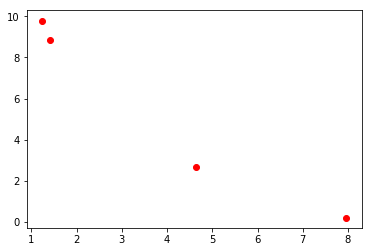

In [137]:
y_test = np.random.randint(2,size=(10,))
y_test

plt.scatter(X_test[y_test==0,0], X_test[y_test==0,1], color='r')
x_predict = np.array([1.5, 6]).reshape(1, -1)
# plt.scatter(x_predict[0], x_predict[1], color='g')
plt.show()

In [ ]:
from math import sqrt
from collections import Counter
def predict_y(X_train,y_train,x_test):
    distance = [sqrt(np.sum((x_test - x_train) ** 2)) for x_train in X_train]
    nearst_index = np.argsort(distance)[:3]
    nearst = [y_train[index] for index in nearst_index]
    votes = Counter(nearst)
    return votes.most_common(1)[0][0]

In [ ]:
predict_y(X_test, y_test, x_predict)

### 使用sklearn 库的KNN

In [3]:
from sklearn.neighbors import KNeighborsClassifier

####  1 数据准备

In [81]:
from sklearn.datasets import load_iris
data = load_iris()

In [142]:
X, y = data.data, data.target
X.shape

(150, 4)

In [83]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)

#### 2 使用网格搜索 通过选择不同对超参数组合 找出最好的模型

In [92]:
from sklearn.preprocessing import StandardScaler,Normalizer
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [94]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [143]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_test, y_test)
knn_clf.predict()
knn_clf.score()

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [127]:
grid_params = [{
    'n_neighbors': [i for i in range(1,10)],
    'weights': ['uniform'],
     'p': [ i for i in range(1, 5)]
},{
     'n_neighbors': [i for i in range(1, 10)],
    'weights':['distance'],
    'p': [ i for i in range(1, 5)]
}
]

In [128]:
grid_cv = GridSearchCV(knn_clf, grid_params, n_jobs=-1, verbose=2)

In [134]:
%%time
grid_cv.fit(X, y)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:    1.6s finished


Wall time: 2.13 s


GridSearchCV(cv=None, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9], 'weights': ['uniform'], 'p': [1, 2, 3, 4]}, {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9], 'weights': ['distance'], 'p': [1, 2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [135]:
grid_cv.best_score_

0.9866666666666667

In [136]:
grid_cv.best_params_
grid_cv.best_estimator_

{'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}

### 使用自己封装的knn库

In [ ]:
from playML.KNN import KNNClassifier

In [ ]:
classifier = KNNClassifier(k=5)

In [ ]:
classifier.fit(X_test, y_test)

In [ ]:
classifier.predict(x_predict.reshape(1, -1))